# Handling text data with Pandas

In [1]:
# Load in pandas, and some other useful packages
# Note it is typical to load pandas as pd
import os, sys
import pandas as pd
import numpy as np
from calendar import month_name

from pathlib import Path

notebook_dir = os.getcwd()
data_dir = str(Path(notebook_dir).parents[1] / 'data_samples' / 'csv')

## Read/write data to/from Dataframes

Dataframes and Series are the core objects in Pandas. Think of a Dataframe as like an Excel spreadsheet, except we can do much more with a Dataframe and it is much faster than Excel! You can think of a Series as a single column in your spreadsheet.

We will start by loading a Dataframe from CSV. Let's take a look at the file first (just the first few lines)


In [2]:
!head -n 5 ../../data_samples/csv/el_nino_3.4.csv

1979  -0.13  -0.22  -0.02   0.02  -0.25  -0.29  -0.47  -0.10   0.28   0.11   0.29   0.52
1980   0.54   0.22   0.03  -0.07   0.08   0.21  -0.06  -0.38  -0.28  -0.26  -0.10   0.05
1981  -0.36  -0.64  -0.64  -0.53  -0.57  -0.46  -0.64  -0.53  -0.19  -0.30  -0.41  -0.20
1982   0.13  -0.17   0.13   0.21   0.45   0.53   0.37   0.73   1.49   1.99   1.92   2.20
1983   2.35   1.94   1.38   0.95   0.90   0.54  -0.11  -0.27  -0.52  -1.16  -1.29  -1.03


This text file has rows where data is separated by two spaces (in this case, each row gives the El Nino 3.4 Index for every month in a given year). 

Pandas is great at dealing with any data separated by a particular set of characters, including commas (of course!), and tabs.

NOTE: Here we are loading data that is separated by two blank spaces, so we have to specify the 'sep' parameter (as the default is comma separated). There are two alternatives to load this; use `sep='  '`, or `sep='\s+'`. The second one will deal with arbitrary numbers of blank spaces, so is more flexible. This is equivalent to using `delim_whitespace=True` in the input arguments

In [2]:
column_names = ['YEAR'] + [month_name[n] for n in range(1, 13)]

df = pd.read_csv(os.path.join(data_dir, 'el_nino_3.4.csv'), 
                 header=None, 
                 sep='\s+', names=column_names)

In [3]:
# .head() is a useful method to have a quick look at the data
df.head(n=5)

,YEAR,January,February,March,April,May,June,July,August,September,October,November,December
0,1979,-0.13,-0.22,-0.02,0.02,-0.25,-0.29,-0.47,-0.10,0.28,0.11,0.29,0.52
1,1980,0.54,0.22,0.03,-0.07,0.08,0.21,-0.06,-0.38,-0.28,-0.26,-0.10,0.05
2,1981,-0.36,-0.64,-0.64,-0.53,-0.57,-0.46,-0.64,-0.53,-0.19,-0.30,-0.41,-0.20
3,1982,0.13,-0.17,0.13,0.21,0.45,0.53,0.37,0.73,1.49,1.99,1.92,2.20
4,1983,2.35,1.94,1.38,0.95,0.90,0.54,-0.11,-0.27,-0.52,-1.16,-1.29,-1.03


Note that we can also deal with comments etc at the beginning of the file. Consider this file:

In [4]:
!head -n 5 ../../data_samples/csv/el_nino_3.4_with_comments.csv

## header comment
## More comments
1979  -0.13  -0.22  -0.02   0.02  -0.25  -0.29  -0.47  -0.10   0.28   0.11   0.29   0.52
1980   0.54   0.22   0.03  -0.07   0.08   0.21  -0.06  -0.38  -0.28  -0.26  -0.10   0.05
1981  -0.36  -0.64  -0.64  -0.53  -0.57  -0.46  -0.64  -0.53  -0.19  -0.30  -0.41  -0.20


first lets see what Pandas does by default

In [5]:
df_with_header_bad = pd.read_csv(os.path.join(data_dir, 'el_nino_3.4_with_comments.csv'), 
                 header=None, 
                 sep='\s+', names=column_names)

df_with_header_bad.head()

,YEAR,January,February,March,April,May,June,July,August,September,October,November,December
0,##,header,comment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,##,More,comments,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1979,-0.13,-0.22,-0.02,0.02,-0.25,-0.29,-0.47,-0.10,0.28,0.11,0.29,0.52
3,1980,0.54,0.22,0.03,-0.07,0.08,0.21,-0.06,-0.38,-0.28,-0.26,-0.10,0.05
4,1981,-0.36,-0.64,-0.64,-0.53,-0.57,-0.46,-0.64,-0.53,-0.19,-0.30,-0.41,-0.20


Solution: use the `skiprows` argument to skip the first two lines of the file

In [6]:
# 
df_with_header = pd.read_csv(os.path.join(data_dir, 'el_nino_3.4_with_comments.csv'), 
                 header=None, 
                 sep='\s+', names=column_names, skiprows=2)

df_with_header.head()

,YEAR,January,February,March,April,May,June,July,August,September,October,November,December
0,1979,-0.13,-0.22,-0.02,0.02,-0.25,-0.29,-0.47,-0.10,0.28,0.11,0.29,0.52
1,1980,0.54,0.22,0.03,-0.07,0.08,0.21,-0.06,-0.38,-0.28,-0.26,-0.10,0.05
2,1981,-0.36,-0.64,-0.64,-0.53,-0.57,-0.46,-0.64,-0.53,-0.19,-0.30,-0.41,-0.20
3,1982,0.13,-0.17,0.13,0.21,0.45,0.53,0.37,0.73,1.49,1.99,1.92,2.20
4,1983,2.35,1.94,1.38,0.95,0.90,0.54,-0.11,-0.27,-0.52,-1.16,-1.29,-1.03


read_csv has many other helpful options for loading data, look at the read_csv documentation for more! https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

Once we have done our work, we can save the dataframe using .to_csv():

In [7]:
df.to_csv('my_file.csv')

## Describing the data

In [104]:
# As noted above, .head(n) is very useful to have a quick look at the top rows
# .tail(n) shows the end rows
df.head(3)

,Year,January,February,March,April,May,June,July,August,September,October,November,December
0,1979,-0.13,-0.22,-0.02,0.02,-0.25,-0.29,-0.47,-0.10,0.28,0.11,0.29,0.52
1,1980,0.54,0.22,0.03,-0.07,0.08,0.21,-0.06,-0.38,-0.28,-0.26,-0.10,0.05
2,1981,-0.36,-0.64,-0.64,-0.53,-0.57,-0.46,-0.64,-0.53,-0.19,-0.30,-0.41,-0.20


In [9]:
# len() works just like for Python lists and gives you the number of rows
print(len(df))

45


In [10]:
# .describe() is a useful method to summarise the data
df.describe()

,YEAR,January,February,March,April,May,June,July,August,September,October,November,December
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,2001.000000,-0.056444,-0.059333,-0.062000,-0.092667,-0.093556,-0.072667,-0.072222,-0.024667,0.017556,-0.022667,-0.029111,0.005556
std,13.133926,1.117380,0.943739,0.726882,0.601775,0.600470,0.610999,0.674392,0.774692,0.882932,1.044349,1.170497,1.207480
min,1979.000000,-1.970000,-1.670000,-1.210000,-1.180000,-1.250000,-1.740000,-1.740000,-1.390000,-1.600000,-1.900000,-2.050000,-1.960000
25%,1990.000000,-0.870000,-0.710000,-0.640000,-0.500000,-0.520000,-0.420000,-0.480000,-0.530000,-0.550000,-0.740000,-0.940000,-0.950000
50%,2001.000000,-0.150000,-0.170000,-0.020000,0.020000,-0.110000,-0.080000,-0.110000,-0.100000,-0.180000,-0.200000,-0.280000,-0.170000
75%,2012.000000,0.600000,0.370000,0.390000,0.260000,0.320000,0.340000,0.250000,0.320000,0.470000,0.730000,0.900000,0.890000
max,2023.000000,2.570000,2.260000,1.620000,1.200000,1.040000,1.180000,1.560000,1.930000,2.210000,2.360000,2.720000,2.660000


In [11]:
# A single column of a Dataframe is called a Series
type(df['January'])

pandas.core.series.Series

## Selecting and manipulating data

In [12]:
# Rename a column. Note axis=1 for renaming columns
df = df.rename({'YEAR': 'Year'}, axis=1)
df.head()

,Year,January,February,March,April,May,June,July,August,September,October,November,December
0,1979,-0.13,-0.22,-0.02,0.02,-0.25,-0.29,-0.47,-0.10,0.28,0.11,0.29,0.52
1,1980,0.54,0.22,0.03,-0.07,0.08,0.21,-0.06,-0.38,-0.28,-0.26,-0.10,0.05
2,1981,-0.36,-0.64,-0.64,-0.53,-0.57,-0.46,-0.64,-0.53,-0.19,-0.30,-0.41,-0.20
3,1982,0.13,-0.17,0.13,0.21,0.45,0.53,0.37,0.73,1.49,1.99,1.92,2.20
4,1983,2.35,1.94,1.38,0.95,0.90,0.54,-0.11,-0.27,-0.52,-1.16,-1.29,-1.03


In [13]:
# Select based on row
df[df['Year'] == 1979]

,Year,January,February,March,April,May,June,July,August,September,October,November,December
0,1979,-0.13,-0.22,-0.02,0.02,-0.25,-0.29,-0.47,-0.1,0.28,0.11,0.29,0.52


In [14]:
# Select based on an interval: in this case all rows for years greater or equal to 2020
df[df['Year'] >= 2020]

,Year,January,February,March,April,May,June,July,August,September,October,November,December
41,2020,0.60,0.37,0.48,0.36,-0.27,-0.34,-0.30,-0.59,-0.83,-1.26,-1.42,-1.15
42,2021,-1.00,-1.00,-0.80,-0.72,-0.46,-0.28,-0.39,-0.53,-0.55,-0.94,-0.94,-1.06
43,2022,-0.94,-0.89,-0.97,-1.11,-1.11,-0.75,-0.69,-0.97,-1.07,-0.99,-0.90,-0.85
44,2023,-0.72,-0.46,-0.11,0.14,0.46,0.84,1.02,1.35,1.60,1.72,2.02,2.03


In [15]:
# Select based on a list of items
df[df['Year'].isin([1990, 2021])]

,Year,January,February,March,April,May,June,July,August,September,October,November,December
11,1990,0.01,0.21,0.04,0.08,0.08,-0.08,0.09,0.22,0.22,0.21,0.10,0.35
42,2021,-1.00,-1.00,-0.80,-0.72,-0.46,-0.28,-0.39,-0.53,-0.55,-0.94,-0.94,-1.06


In [16]:
# Use ~ as a logical NOT operation. E.g. get all years that aren't 1990 or 2021
df[~df['Year'].isin([1990, 2021])].head()

,Year,January,February,March,April,May,June,July,August,September,October,November,December
0,1979,-0.13,-0.22,-0.02,0.02,-0.25,-0.29,-0.47,-0.10,0.28,0.11,0.29,0.52
1,1980,0.54,0.22,0.03,-0.07,0.08,0.21,-0.06,-0.38,-0.28,-0.26,-0.10,0.05
2,1981,-0.36,-0.64,-0.64,-0.53,-0.57,-0.46,-0.64,-0.53,-0.19,-0.30,-0.41,-0.20
3,1982,0.13,-0.17,0.13,0.21,0.45,0.53,0.37,0.73,1.49,1.99,1.92,2.20
4,1983,2.35,1.94,1.38,0.95,0.90,0.54,-0.11,-0.27,-0.52,-1.16,-1.29,-1.03


In [17]:
# Select based on multiple boolean conditions using | for 'OR' and & for 'AND'
df[ (df['Year'] >= 2020) | (df['Year'] < 1981)]

,Year,January,February,March,April,May,June,July,August,September,October,November,December
0,1979,-0.13,-0.22,-0.02,0.02,-0.25,-0.29,-0.47,-0.10,0.28,0.11,0.29,0.52
1,1980,0.54,0.22,0.03,-0.07,0.08,0.21,-0.06,-0.38,-0.28,-0.26,-0.10,0.05
41,2020,0.60,0.37,0.48,0.36,-0.27,-0.34,-0.30,-0.59,-0.83,-1.26,-1.42,-1.15
42,2021,-1.00,-1.00,-0.80,-0.72,-0.46,-0.28,-0.39,-0.53,-0.55,-0.94,-0.94,-1.06
43,2022,-0.94,-0.89,-0.97,-1.11,-1.11,-0.75,-0.69,-0.97,-1.07,-0.99,-0.90,-0.85
44,2023,-0.72,-0.46,-0.11,0.14,0.46,0.84,1.02,1.35,1.60,1.72,2.02,2.03


In [18]:
# Select all years after 2000 with a negative index in December

df[ (df['Year'] > 2000) & (df['December'] < 0)]

,Year,January,February,March,April,May,June,July,August,September,October,November,December
22,2001,-0.73,-0.63,-0.48,-0.49,-0.34,-0.19,-0.04,-0.05,-0.20,-0.14,-0.37,-0.41
26,2005,0.66,0.36,0.45,0.26,0.30,0.04,-0.23,-0.05,-0.04,-0.06,-0.59,-0.92
28,2007,0.70,0.13,-0.18,-0.32,-0.47,-0.35,-0.59,-0.72,-1.11,-1.39,-1.54,-1.58
29,2008,-1.68,-1.67,-1.21,-0.99,-0.84,-0.68,-0.30,-0.13,-0.25,-0.35,-0.46,-0.86
31,2010,1.52,1.25,0.90,0.38,-0.22,-0.69,-1.07,-1.39,-1.60,-1.69,-1.64,-1.60
32,2011,-1.54,-1.11,-0.93,-0.77,-0.52,-0.38,-0.43,-0.65,-0.80,-1.05,-1.19,-1.06
33,2012,-0.87,-0.67,-0.61,-0.50,-0.32,0.02,0.25,0.47,0.38,0.26,0.16,-0.25
34,2013,-0.53,-0.52,-0.25,-0.25,-0.40,-0.42,-0.39,-0.38,-0.18,-0.20,-0.14,-0.17
37,2016,2.57,2.26,1.62,0.91,0.30,-0.03,-0.48,-0.58,-0.58,-0.74,-0.76,-0.50
38,2017,-0.43,-0.08,0.03,0.22,0.37,0.34,0.25,-0.16,-0.43,-0.56,-0.97,-0.98


## Modifying values

You can update based on your selection

e.g. imagine we are not confident in the data before 1985, let's set it to be NaN (='Not a Number'):

In [19]:
updated_df = df.copy()

updated_df[updated_df['Year'] < 1985] = np.nan
updated_df.head(n=10)

# Notice that it has changed the years from integers to floats, since numpy's nan is a float

,Year,January,February,March,April,May,June,July,August,September,October,November,December
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1985.0,-1.16,-0.72,-0.79,-1.18,-1.03,-0.91,-0.74,-0.56,-0.70,-0.49,-0.37,-0.41
7,1986.0,-0.66,-0.71,-0.42,-0.33,-0.53,-0.31,-0.11,0.32,0.53,0.81,1.01,1.12
8,1987.0,1.14,1.13,0.98,0.58,0.62,0.92,1.29,1.57,1.65,1.24,1.07,0.94
9,1988.0,0.90,0.28,0.10,-0.44,-1.25,-1.74,-1.74,-1.19,-1.00,-1.90,-2.05,-1.96


In [20]:
# Now lets select only the non-null values using .notnull()

non_null_df = updated_df[updated_df['Year'].notnull()]
non_null_df.head()

,Year,January,February,March,April,May,June,July,August,September,October,November,December
6,1985.0,-1.16,-0.72,-0.79,-1.18,-1.03,-0.91,-0.74,-0.56,-0.70,-0.49,-0.37,-0.41
7,1986.0,-0.66,-0.71,-0.42,-0.33,-0.53,-0.31,-0.11,0.32,0.53,0.81,1.01,1.12
8,1987.0,1.14,1.13,0.98,0.58,0.62,0.92,1.29,1.57,1.65,1.24,1.07,0.94
9,1988.0,0.90,0.28,0.10,-0.44,-1.25,-1.74,-1.74,-1.19,-1.00,-1.90,-2.05,-1.96
10,1989.0,-1.97,-1.47,-1.21,-1.08,-0.88,-0.59,-0.57,-0.53,-0.30,-0.40,-0.45,-0.13


In [21]:
# We can also perform operations on the data in very intuitive ways, e.g. let's add 100 to every element in the January Series

df['January'] + 100

0      99.87
1     100.54
2      99.64
3     100.13
4     102.35
5      99.33
6      98.84
7      99.34
8     101.14
9     100.90
10     98.03
11    100.01
12    100.49
13    101.84
14    100.14
15    100.10
16    101.02
17     99.14
18     99.47
19    102.38
20     98.31
21     98.23
22     99.27
23     99.85
24    100.60
25    100.27
26    100.66
27     99.09
28    100.70
29     98.32
30     99.11
31    101.52
32     98.46
33     99.13
34     99.47
35     99.51
36    100.51
37    102.57
38     99.57
39     99.02
40    100.65
41    100.60
42     99.00
43     99.06
44     99.28
Name: January, dtype: float64

## Plotting data

In [24]:
df

,Year,January,February,March,April,May,June,July,August,September,October,November,December
0,1979,-0.13,-0.22,-0.02,0.02,-0.25,-0.29,-0.47,-0.10,0.28,0.11,0.29,0.52
1,1980,0.54,0.22,0.03,-0.07,0.08,0.21,-0.06,-0.38,-0.28,-0.26,-0.10,0.05
2,1981,-0.36,-0.64,-0.64,-0.53,-0.57,-0.46,-0.64,-0.53,-0.19,-0.30,-0.41,-0.20
3,1982,0.13,-0.17,0.13,0.21,0.45,0.53,0.37,0.73,1.49,1.99,1.92,2.20
4,1983,2.35,1.94,1.38,0.95,0.90,0.54,-0.11,-0.27,-0.52,-1.16,-1.29,-1.03
5,1984,-0.67,-0.19,-0.52,-0.68,-0.73,-0.90,-0.50,-0.24,-0.34,-0.67,-1.19,-1.34
6,1985,-1.16,-0.72,-0.79,-1.18,-1.03,-0.91,-0.74,-0.56,-0.70,-0.49,-0.37,-0.41
7,1986,-0.66,-0.71,-0.42,-0.33,-0.53,-0.31,-0.11,0.32,0.53,0.81,1.01,1.12
8,1987,1.14,1.13,0.98,0.58,0.62,0.92,1.29,1.57,1.65,1.24,1.07,0.94
9,1988,0.90,0.28,0.10,-0.44,-1.25,-1.74,-1.74,-1.19,-1.00,-1.90,-2.05,-1.96


<Axes: title={'center': 'My Plot'}, xlabel='Year', ylabel='ENSO index'>

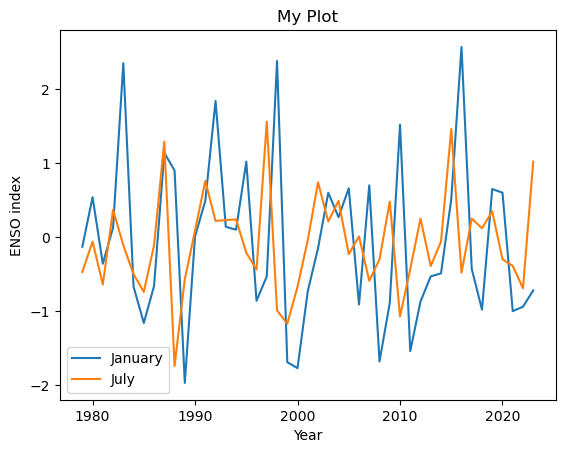

In [35]:
# Pandas has some handy builtin plotting methods, for when you need to quickly examine your data

df.plot(title='My Plot', y=['January', 'July'], x='Year', ylabel='ENSO index', xlabel='Year')

Text(0, 0.5, 'ENSO index')

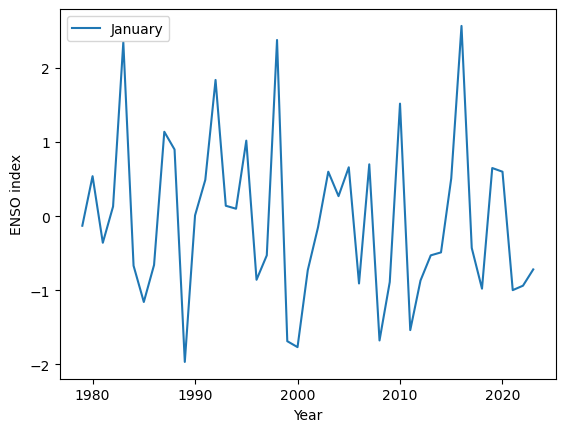

In [41]:
# Note that df.plot() returns a matplotlib axis, so you can tweak the plot in the normal matplotlib way

ax = df.plot(x='Year', y='January')
ax.set_ylabel('ENSO index')

<Axes: xlabel='ENSO index', ylabel='Frequency'>

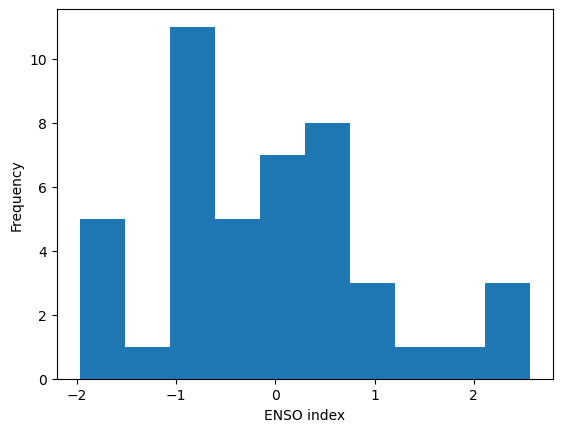

In [36]:
df['January'].plot(kind='hist', xlabel='ENSO index')

Text(0.5, 0, 'ENSO index')

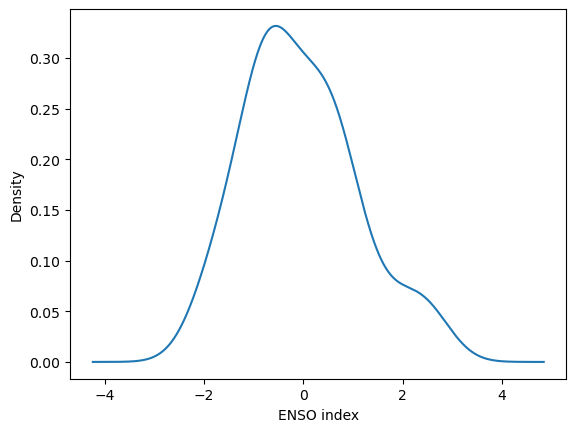

In [44]:
# Smoothed version using Kernel Desnity Estimation (quite slow for large amounts of data)
# Note that for some reason xlabel doesn't work within the .plot command for this case
ax = df['January'].plot(kind='kde')
ax.set_xlabel('ENSO index')

## Indexes

In [62]:
# We can also set Year as an Index. Note how the Year column data replaces the existing index.
df_indexed = df.set_index('Year').head()

In [63]:
# This allows us to access data in a Series in a different way
df_indexed['January'][1979]

-0.13

In [64]:
# And allows us to access rows from a Dataframe in a more intuitive way, using .loc
df_indexed.loc[1979]

January     -0.13
February    -0.22
March       -0.02
April        0.02
May         -0.25
June        -0.29
July        -0.47
August      -0.10
September    0.28
October      0.11
November     0.29
December     0.52
Name: 1979, dtype: float64

## Time Series Data

In [54]:
# First load daily precipitation values. Note that the separator is a | 
df_ts = pd.read_csv(os.path.join(data_dir, 'daily_precip.csv'), sep='|')

In [55]:
# to unleash the full power of pandas, convert date columns to datetimes
df_ts['date'] = pd.to_datetime(df_ts['date'])

In [56]:
# This allows us to access intuitive date properties such as hour, day, month, day of year,
df_ts['date'].dt.day_of_year

0         1
1         2
2         3
3         4
4         5
       ... 
5839    361
5840    362
5841    363
5842    364
5843    365
Name: date, Length: 5844, dtype: int32

In [57]:
# With time as an index, you can easily get things like year, month from the date
df_ts = df_ts.set_index('date')
df_ts.index.month

Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       ...
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
      dtype='int32', name='date', length=5844)

In [58]:
# Also, with a time index, we can more easily aggregate the time series data. E.g. lets get the weekly total
df_ts.resample("7d").sum()

,precipitation
date,
2003-01-01,17.746313
2003-01-08,10.728704
2003-01-15,13.367671
2003-01-22,10.223014
2003-01-29,8.260598
...,...
2018-11-28,13.146701
2018-12-05,21.211174
2018-12-12,17.364524


In [59]:
# Or the yearly total
df_ts.resample("1y").sum()

/var/folders/v4/9hznb5s5563242xcz40z0xl40000gn/T/ipykernel_42569/224948974.py:2: FutureWarning: 'y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_ts.resample("1y").sum()


,precipitation
date,
2003-12-31,793.087921
2004-12-31,844.902627
2005-12-31,757.349754
2006-12-31,1005.353304
2007-12-31,854.207325
2008-12-31,850.134453
2009-12-31,800.859390
2010-12-31,828.675217
2011-12-31,877.819516


## Grouping data

In [60]:
# First load daily precipitation values. Note that the separator is a | 
df_ts = pd.read_csv(os.path.join(data_dir, 'daily_precip.csv'), sep='|')

In [61]:
# Change date to a datetime column, and extact a new column with day of year
df_ts['date'] = pd.to_datetime(df_ts['date'])
df_ts['day_of_year'] = df_ts['date'].dt.day_of_year

<Axes: xlabel='day_of_year'>

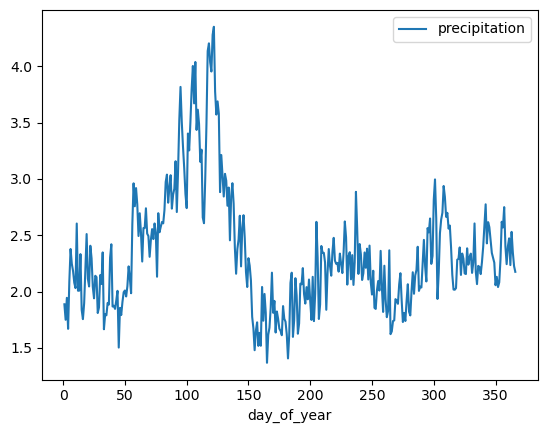

In [62]:
# You can use groupby with built in functions to calculate metrics 
# Lets get the average precipitation by day of year
# Note that we first remove the 'time' column, since we don't want to aggregate that

day_of_year_precip = df_ts[['day_of_year', 'precipitation']].groupby('day_of_year').mean()
day_of_year_precip.plot()

In [64]:
# Or if you need to do several different summary statistics, agg() is more flexible
df_grouped = df_ts[['day_of_year', 'precipitation']].groupby('day_of_year').agg(['min', 'max', 'mean'])
df_grouped.head()

precipitation                    
                      min       max      mean
day_of_year                                  
1                0.532164  3.203813  1.887613
2                0.629081  3.805251  1.749999
3                0.564260  4.524392  1.944765
4                0.508851  2.865971  1.669596
5                1.026686  3.211143  2.090941

<Axes: xlabel='day_of_year'>

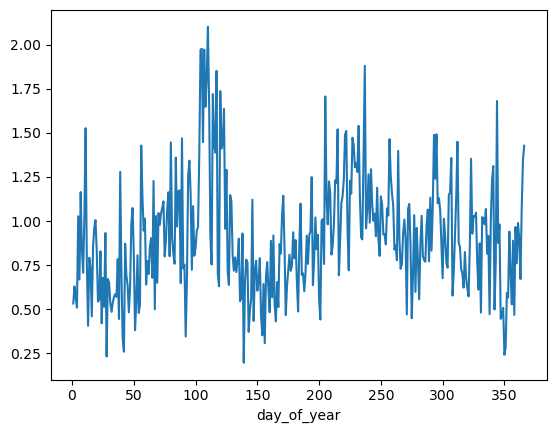

In [65]:
# Note that aggregating in this way has created a nested DataFrame, so you can access the data like so
df_grouped['precipitation']['min'].plot()

## Creating Dataframes and Series

As well as loading from CSV, you can create your own dataframes from lists or dicts

In [66]:
my_new_df = pd.DataFrame({'Column_1': [1,2,3,4,5], 'Column_2': ['A', 'B', 'A', 'C', 'A'], 'Column_3': [0.1, 0.3, -1,0.1, 0.2]})
my_new_df.head()

,Column_1,Column_2,Column_3
0,1,A,0.1
1,2,B,0.3
2,3,A,-1.0
3,4,C,0.1
4,5,A,0.2


In [69]:
# Now lets create a Series
my_new_series = pd.Series({'series_name': [1,2,3,4,5]})

## Exercises

Using observations from the Radcliffe Observatory

1) Load the dataframe in `example_data/Oxford-Radcliffe-daily-data-to-Dec-2023.csv`. Inspect the file to check what information needs to be loaded

2) Subselect only these columns: `Daily Tmean °C`, `Rainfall mm raw incl traces`,`YYYY`, `MM`, `DD`

3) Combine `YYYY`, `MM`, `DD` into a single date column called `Dates` with the format 'YYYY-MM-DD'. Convert this to a datetime column

4) How many dates have Null values for `Rainfall mm raw incl traces`?

5) Convert `Daily Tmean °C` to Kelvin; rename the column appropriately.

6) Calculate the average temperature for each year

7) Calculate the mean and standard deviation of the temperature by month temperature

8) Plot the distribution (using plot() with the kde type)

## Additional functionality

For those who have time / interest, here are some other methods that may be useful, although you can do most things with what we have already covered above

In [ ]:
# Select rows and columns simultaneously
df.loc[df['Year'] > 2000, ['November', 'December']]

In [ ]:
# You can even use the ':' syntax to specify a range of columns
df.loc[df['Year'] > 2000, 'October':'December']

In [75]:
# This also allows you to e.g. find the year with the smallest value
df.loc[df['January'].argmin()]

Year         1989.00
January        -1.97
February       -1.47
March          -1.21
April          -1.08
May            -0.88
June           -0.59
July           -0.57
August         -0.53
September      -0.30
October        -0.40
November       -0.45
December       -0.13
Name: 10, dtype: float64

In [ ]:
# select based on the index of the row/ column instead

df.iloc[0:5,0:3]

In [22]:
# Use stack to get all monthly data in one column
df.loc[:,'January':'December'].stack().head()


0  January    -0.13
   February   -0.22
   March      -0.02
   April       0.02
   May        -0.25
dtype: float64

In [24]:
# Change month from a column to a variable
df.melt(id_vars=['Year'], var_name='Month')

,Year,Month,value
0,1979,January,-0.13
1,1980,January,0.54
2,1981,January,-0.36
3,1982,January,0.13
4,1983,January,2.35
...,...,...,...
535,2019,December,0.52
536,2020,December,-1.15
537,2021,December,-1.06
538,2022,December,-0.85


## Joining data

There is an excellent in-depth tutorial on this on the Real Python site: https://realpython.com/pandas-merge-join-and-concat/

We will give a brief overview here

In [84]:
# First lets create some dummy data, for temperature and precipitation recorded at some fictitious weather stations.
# Note that the location IDs are deliberately not the same in the two dataframes
df_temp = pd.DataFrame({'Location_ID': range(100), 'Temperature': 283*np.random.normal(1,0.1,100)})
df_precip = pd.DataFrame({'Location_ID': range(40,140), 'Precip': np.random.lognormal(mean=1.0, sigma=1.0, size=100)})

print(df_temp.head())
print(df_precip.head())

   Location_ID  Temperature
0            0   315.193286
1            1   260.025487
2            2   280.032867
3            3   253.448433
4            4   326.340818
   Location_ID     Precip
0           40   0.389719
1           41   0.855512
2           42  18.105749
3           43   1.423099
4           44   6.644709


In [92]:
# First lets try an inner join on location ID: this will only return results where the Location_ID column matches in both dataframes
inner_merged = pd.merge(df_temp, df_precip, how='inner', on='Location_ID')

print(inner_merged.head())

print('\nNumber of rows in joined dataframe:', inner_merged.shape)

   Location_ID  Temperature     Precip
0           40   271.742313   0.389719
1           41   281.923483   0.855512
2           42   311.652239  18.105749
3           43   269.096036   1.423099
4           44   291.675897   6.644709

Number of rows in joined dataframe: (60, 3)


In [ ]:
# First lets try an inner join on location ID: this will only return results where the Location_ID column matches in both dataframes
inner_merged = pd.merge(df_temp, df_precip, how='inner', on='Location_ID')

print(inner_merged.head())

print('\nNumber of rows in joined dataframe:', inner_merged.shape)

In [95]:
# Now lets try a full outer join on location ID: this will return results for all values of Location_ID in both dataframes
# Where there is a mismatch in Location_ID values, the value will be NaN in the Dataframe
inner_merged = pd.merge(df_temp, df_precip, how='outer', on='Location_ID')

print(inner_merged.head())

print('\nNumber of rows in joined dataframe:', inner_merged.shape)

   Location_ID  Temperature  Precip
0            0   315.193286     NaN
1            1   260.025487     NaN
2            2   280.032867     NaN
3            3   253.448433     NaN
4            4   326.340818     NaN

Number of rows in joined dataframe: (140, 3)


In [96]:
# Now lets try a left outer join on location ID: this will return results for all values of Location_ID in df_temp (so 100 in total)
inner_merged = pd.merge(df_temp, df_precip, how='left', on='Location_ID')

print(inner_merged.head())

print('\nNumber of rows in joined dataframe:', inner_merged.shape)

   Location_ID  Temperature  Precip
0            0   315.193286     NaN
1            1   260.025487     NaN
2            2   280.032867     NaN
3            3   253.448433     NaN
4            4   326.340818     NaN

Number of rows in joined dataframe: (100, 3)


In [101]:
# Similarly, a 'right' join returns results for all values of Location_ID in df_precip (100 in total)
inner_merged = pd.merge(df_temp, df_precip, how='right', on='Location_ID')

print(inner_merged.tail(10))

print('\nNumber of rows in joined dataframe:', inner_merged.shape)

    Location_ID  Temperature    Precip
90          130          NaN  0.330882
91          131          NaN  4.958218
92          132          NaN  4.579382
93          133          NaN  1.962697
94          134          NaN  2.651553
95          135          NaN  1.301294
96          136          NaN  1.535935
97          137          NaN  2.002225
98          138          NaN  2.751597
99          139          NaN  0.656524

Number of rows in joined dataframe: (100, 3)
